# Chapter 9. Plotting and Visualization

## 9.1 A Brief matplotlib API Primer

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


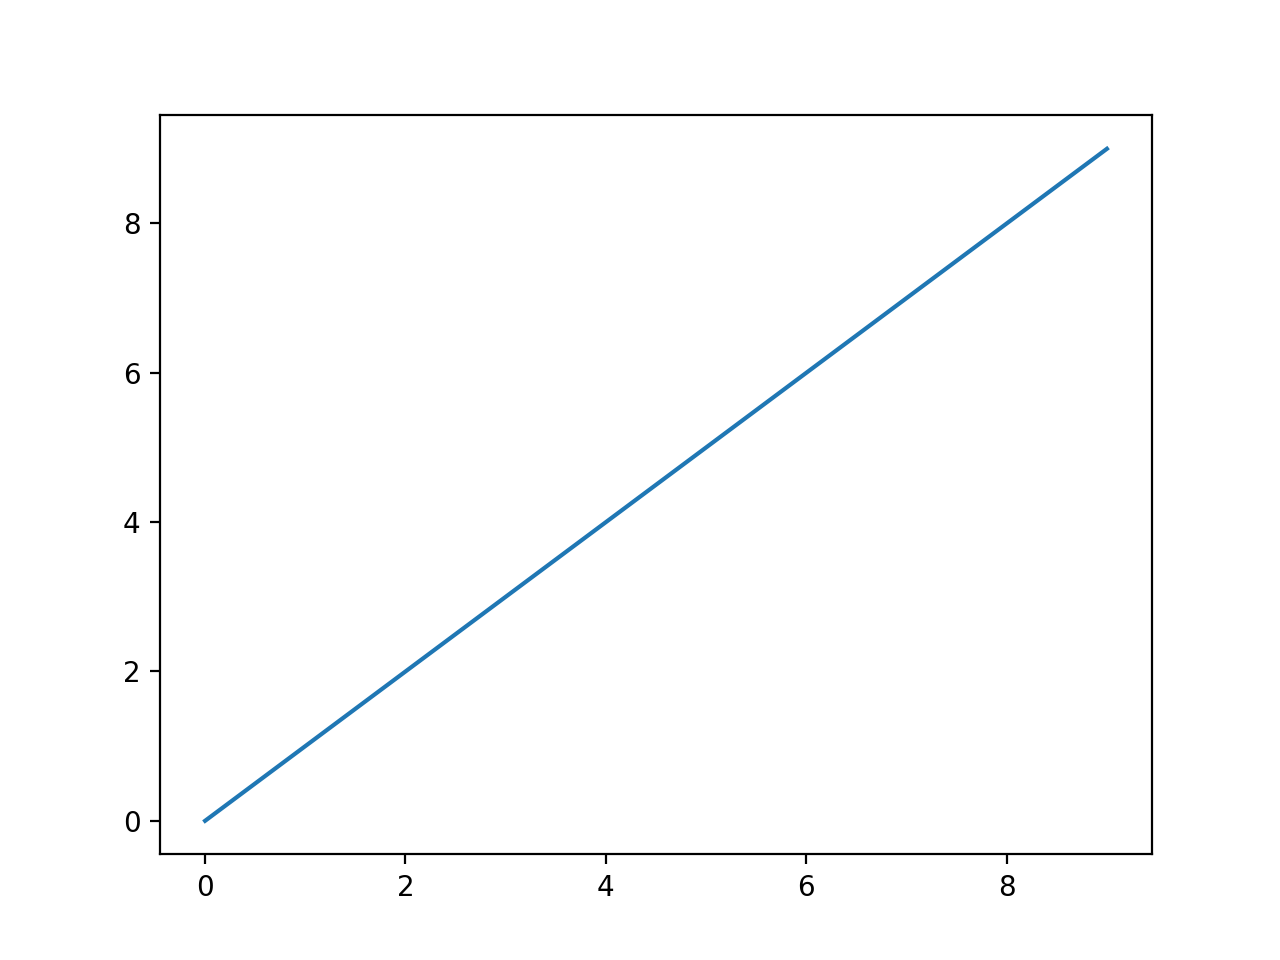

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)
plt.plot(data)

### Figures and Subplots

<IPython.core.display.Javascript object>


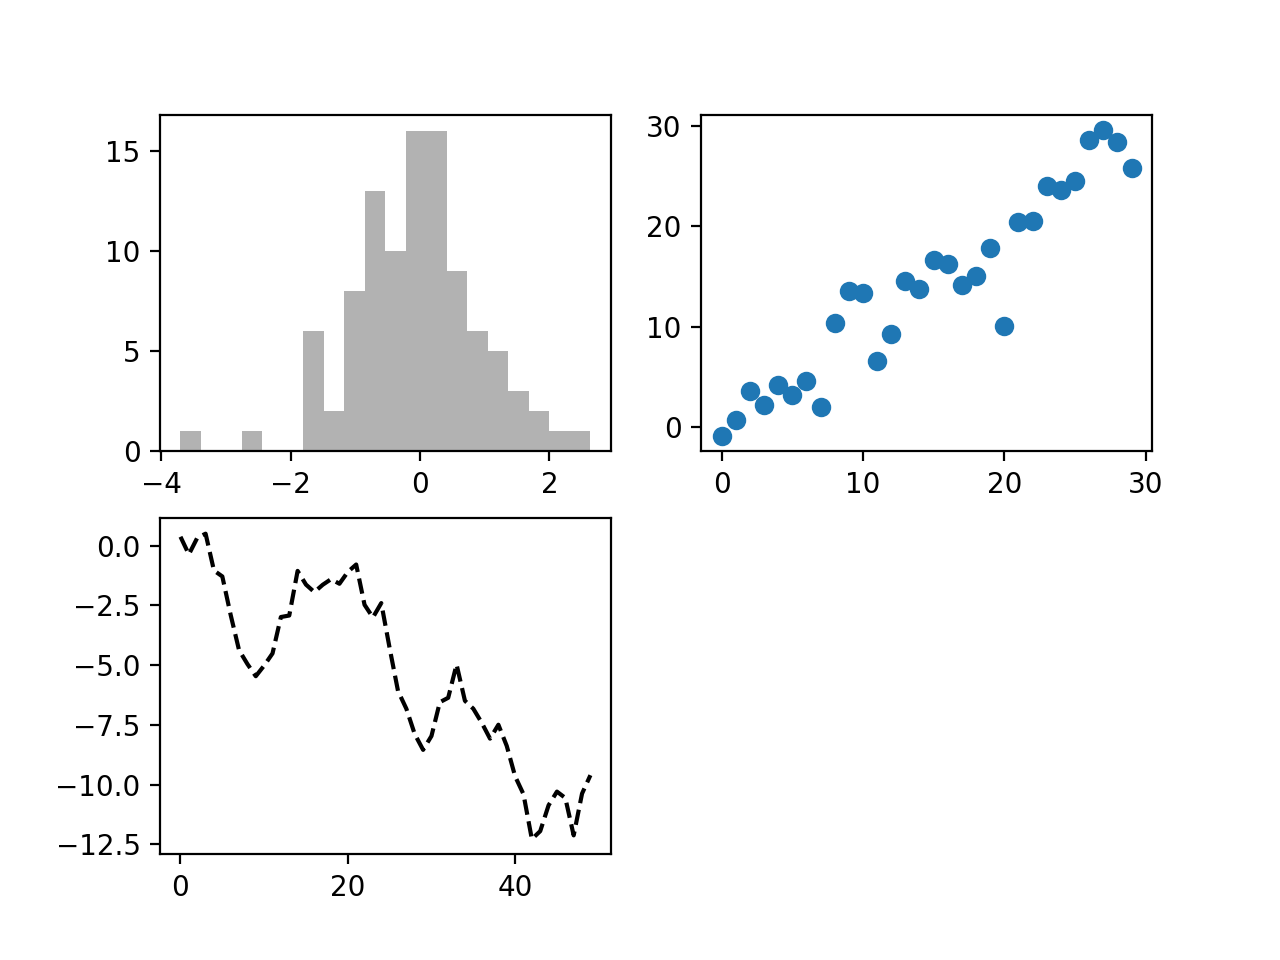

In [3]:
# plots are reside in a figure
fig = plt.figure()

# 1st of a 2x2 figure
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# matplotlib draws on the last plot
# what is a color k? 
#   k = black https://python-graph-gallery.com/196-select-one-color-with-matplotlib/
plt.plot(np.random.randn(50).cumsum(), 'k--') 

_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


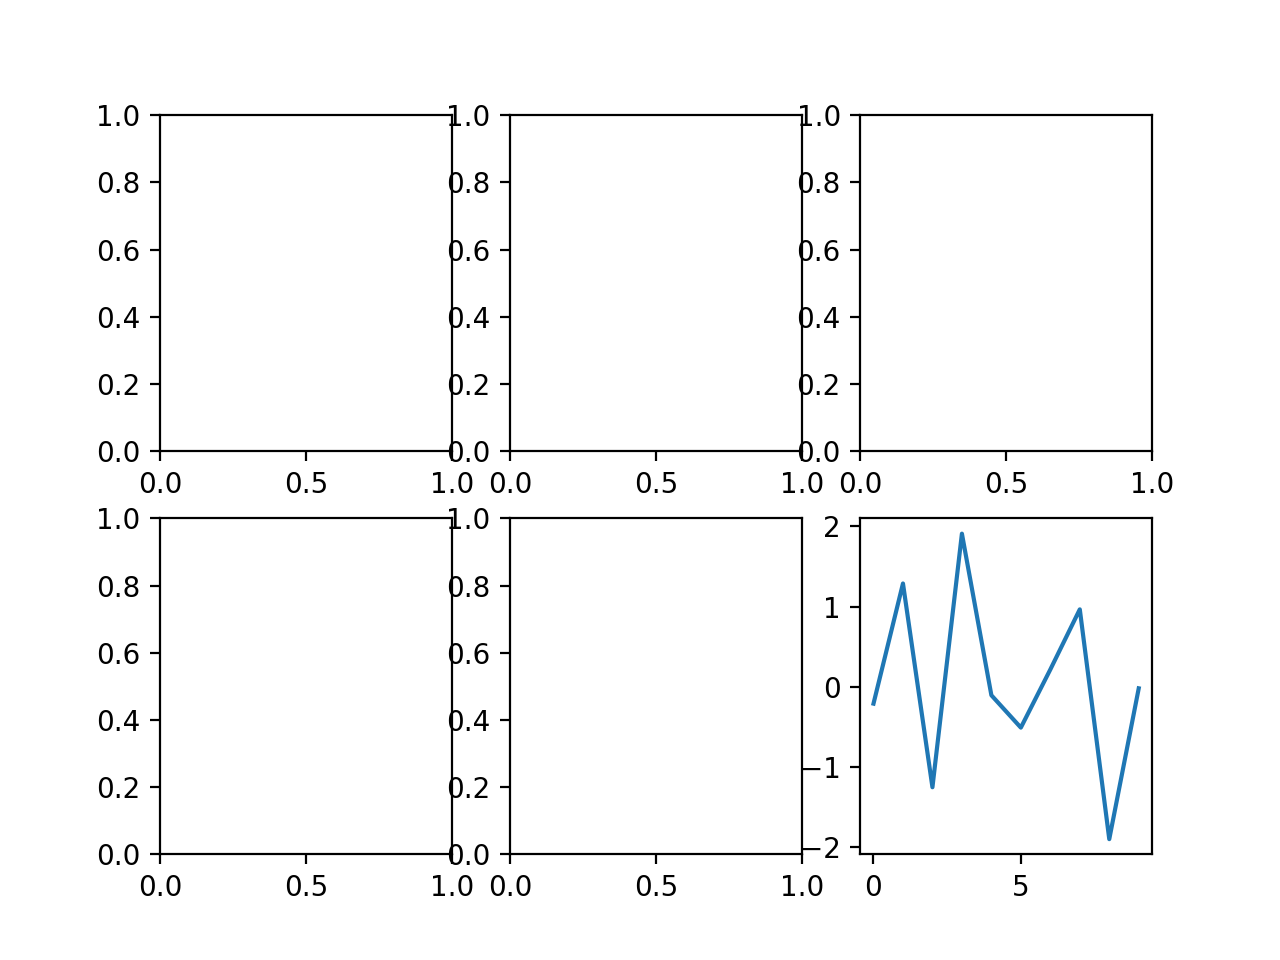

In [4]:
# without having to add_subplot() manually
fig, axes = plt.subplots(2, 3)
axes[1, 2].plot(np.random.randn(10))

### Adjusting the spacing around subplots

<IPython.core.display.Javascript object>


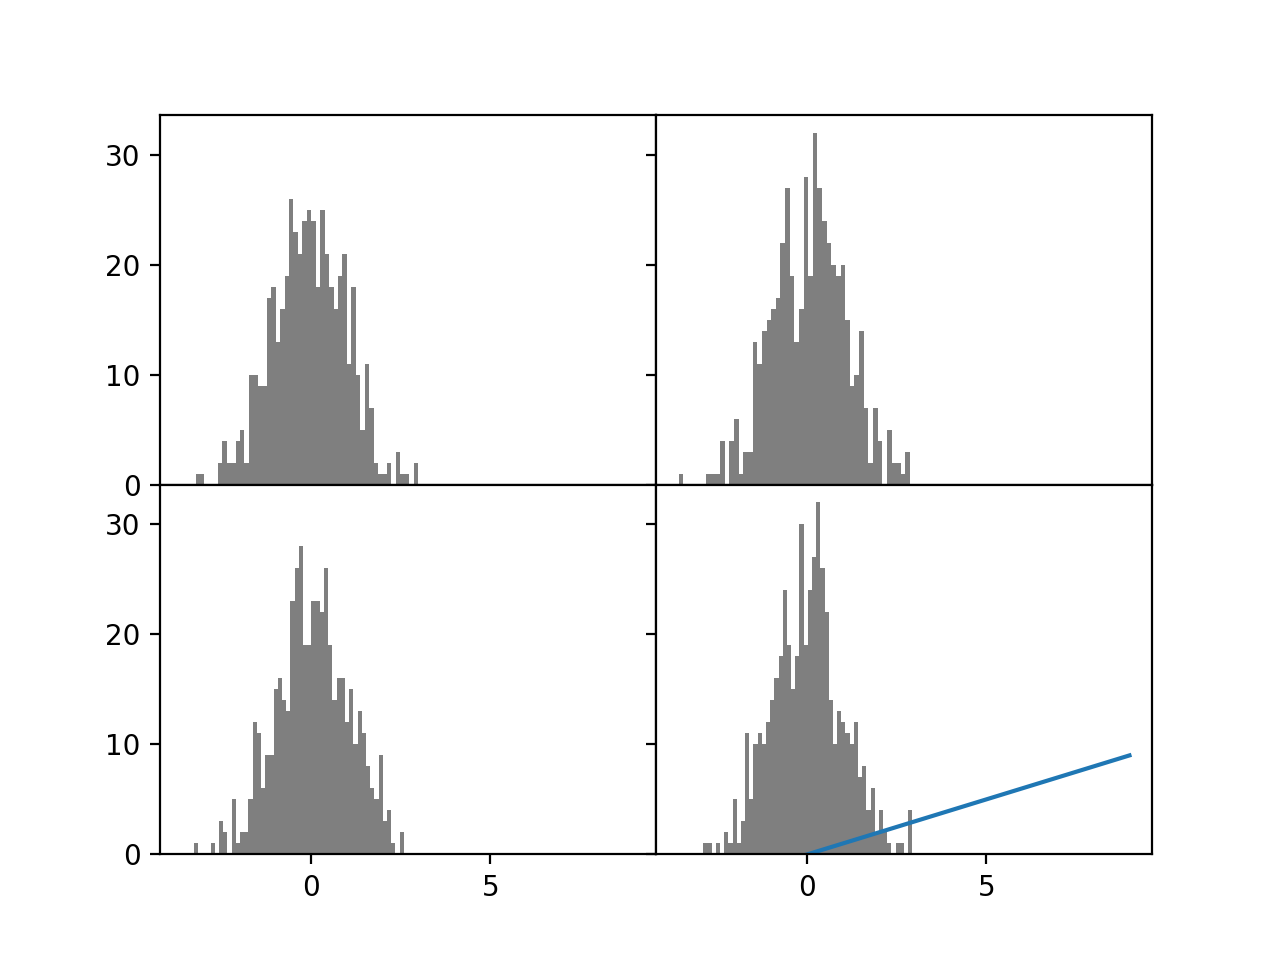

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [6]:
# Why this doesn't show a plot?
#   This plots in the first figure.
plt.plot(np.arange(10))

<IPython.core.display.Javascript object>


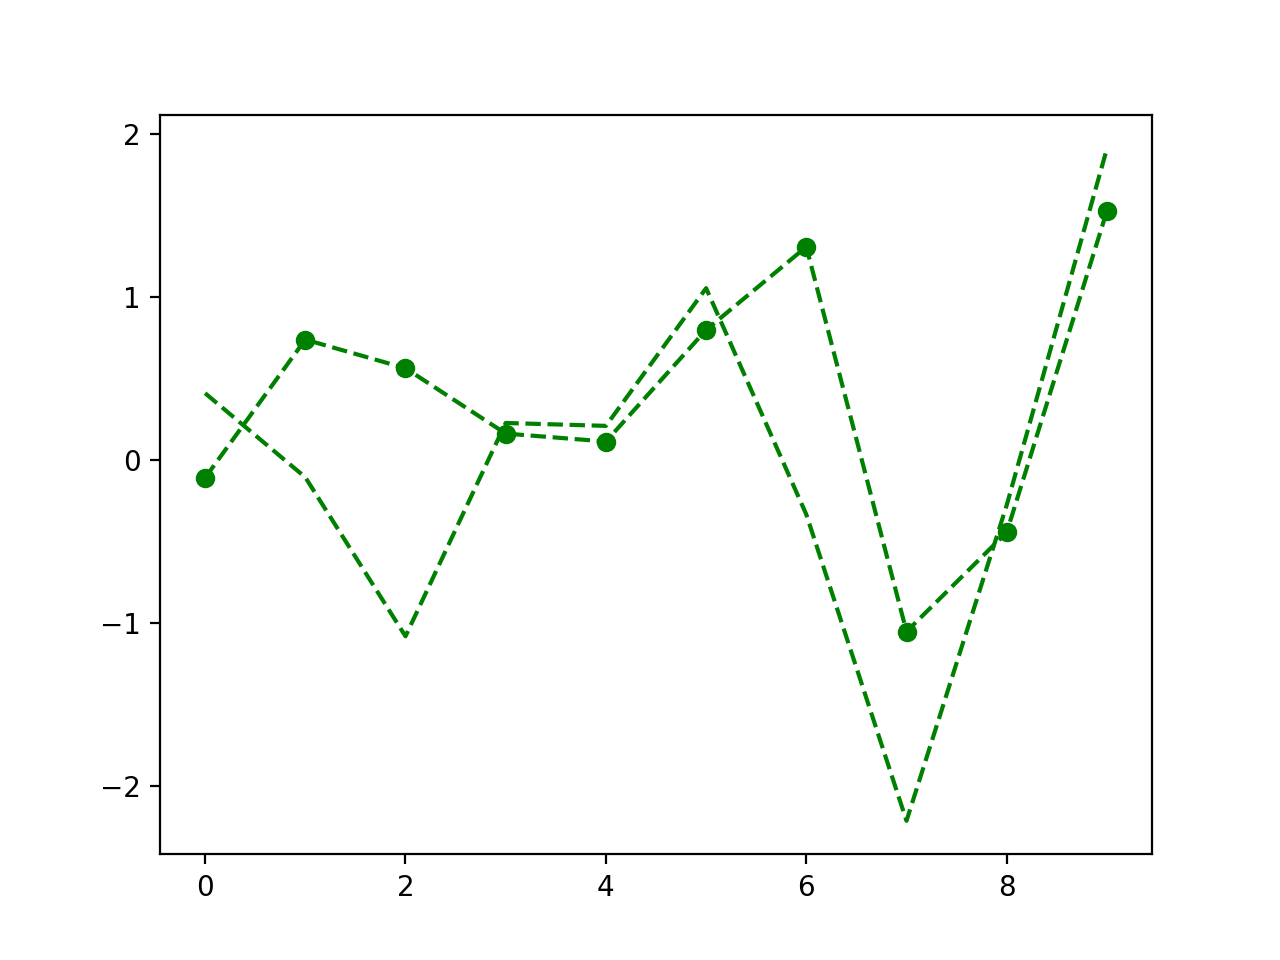

In [7]:
# this returns only one ax
fix, ax = plt.subplots(1, 1) 
ax.plot(np.arange(10), np.random.randn(10), 'g--')

# g-- is the same as below.
# ax.plot(x, y, linestyle='--', color='g')

In [8]:
# Add markers
ax.plot(np.arange(10), np.random.randn(10), 'go--')

<IPython.core.display.Javascript object>


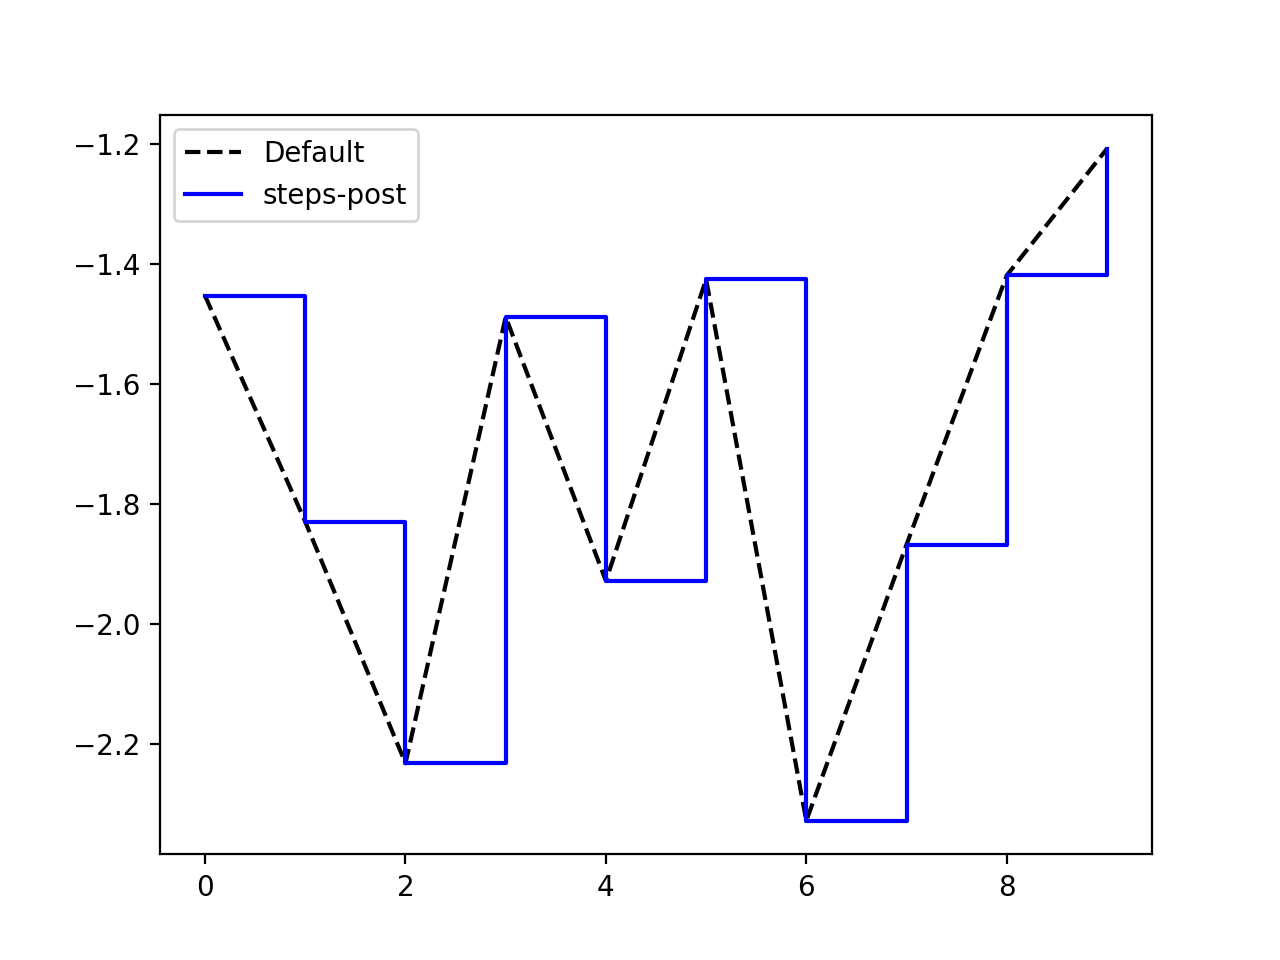

In [9]:
plt.figure()
data = np.random.randn(10).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

Two main ways to do plot decorations
* procedural `pyplot` interface (matplotlib.pyplot)
* object-oriented native matplotlab API

`pyplot` interface methods such as `xlim`, `xticks`, and `xticklabels` act on the active or last created `AxesSubplot`.

<IPython.core.display.Javascript object>


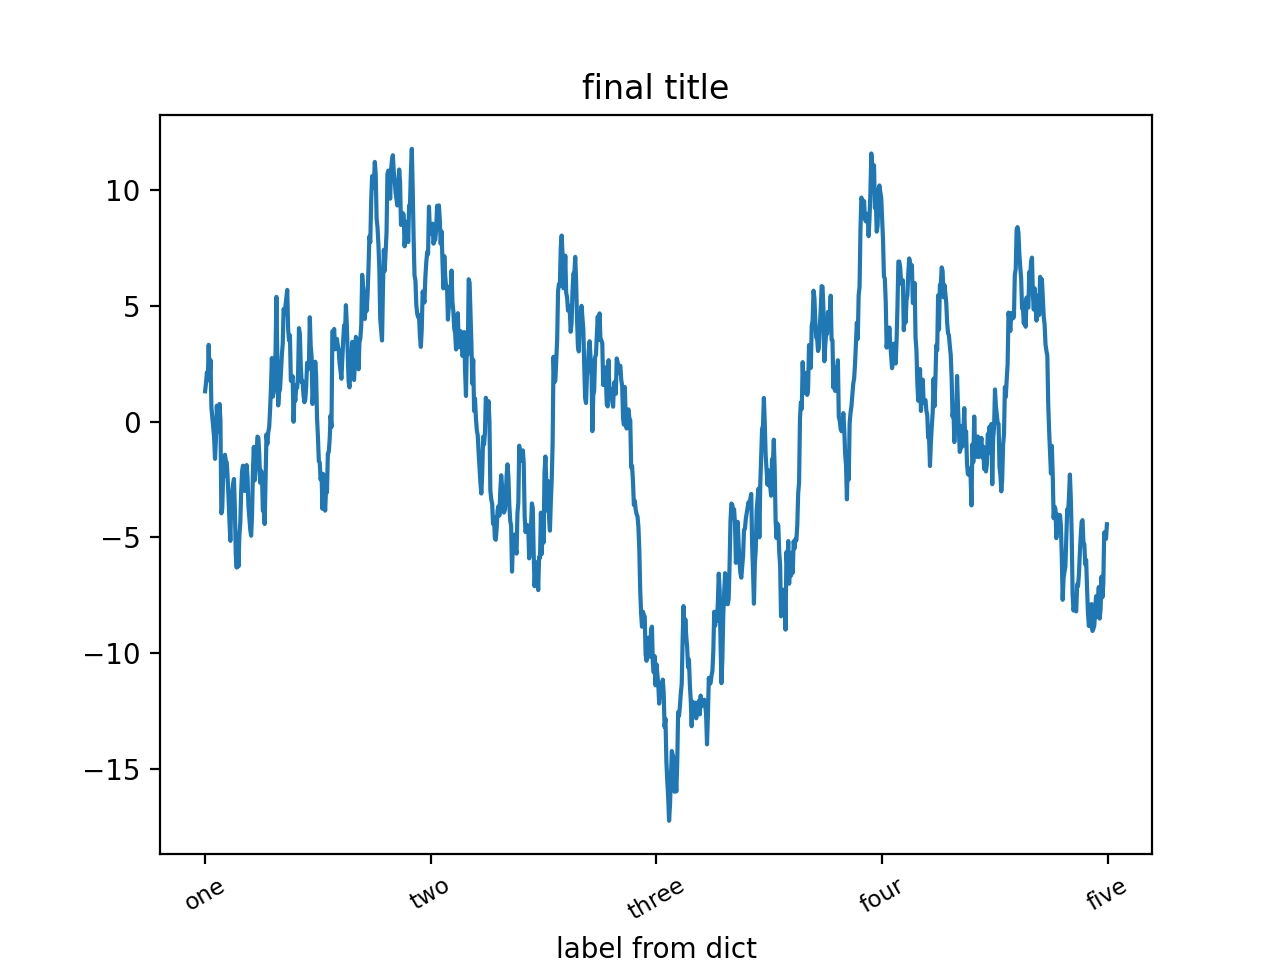

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [11]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                             rotation=30, fontsize='small')

In [12]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

In [13]:
props = {
    'title': 'title from dict',
    'xlabel': 'label from dict'
}
ax.set(**props)

[Text(0.5, 1.0, 'title from dict'), Text(0.5, 0, 'label from dict')]

In [14]:
ax.set(title='final title')

[Text(0.5, 1.0, 'final title')]

### Adding legends

<IPython.core.display.Javascript object>


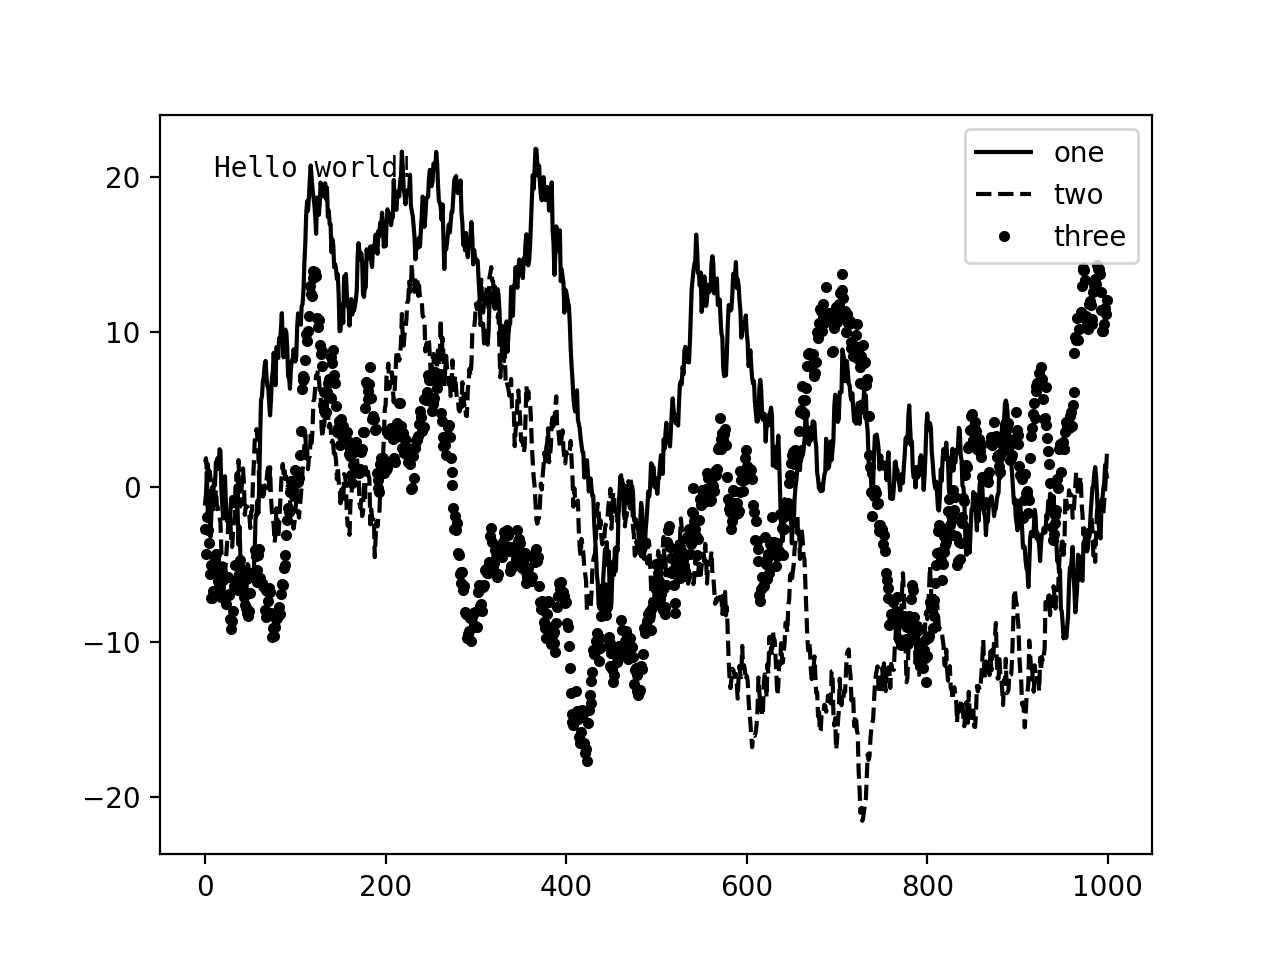

In [16]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [18]:
ax.text(10, 20, 'Hello world!',
        family='monospace', fontsize=10)

Text(10, 20, 'Hello world!')

<IPython.core.display.Javascript object>


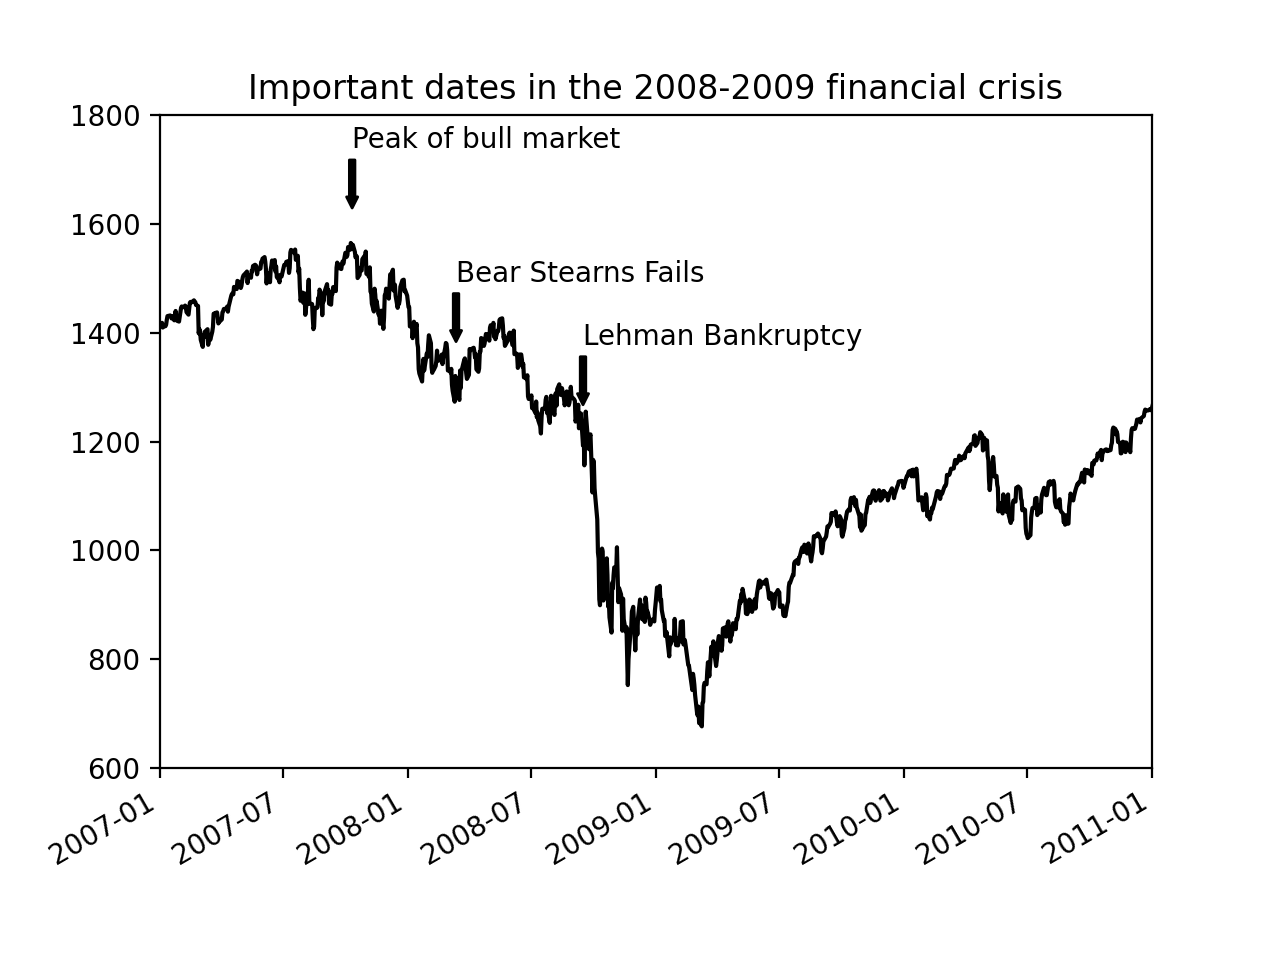

2007-10-11 00:00:00 1554.41
2008-03-12 00:00:00 1308.77
2008-09-15 00:00:00 1192.7


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [21]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('pydata-book/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    print(date, spx.asof(date))
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [22]:
print(len(spx))
print(spx[:5])

5472
1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64


In [25]:
type(spx)

pandas.core.series.Series

<IPython.core.display.Javascript object>


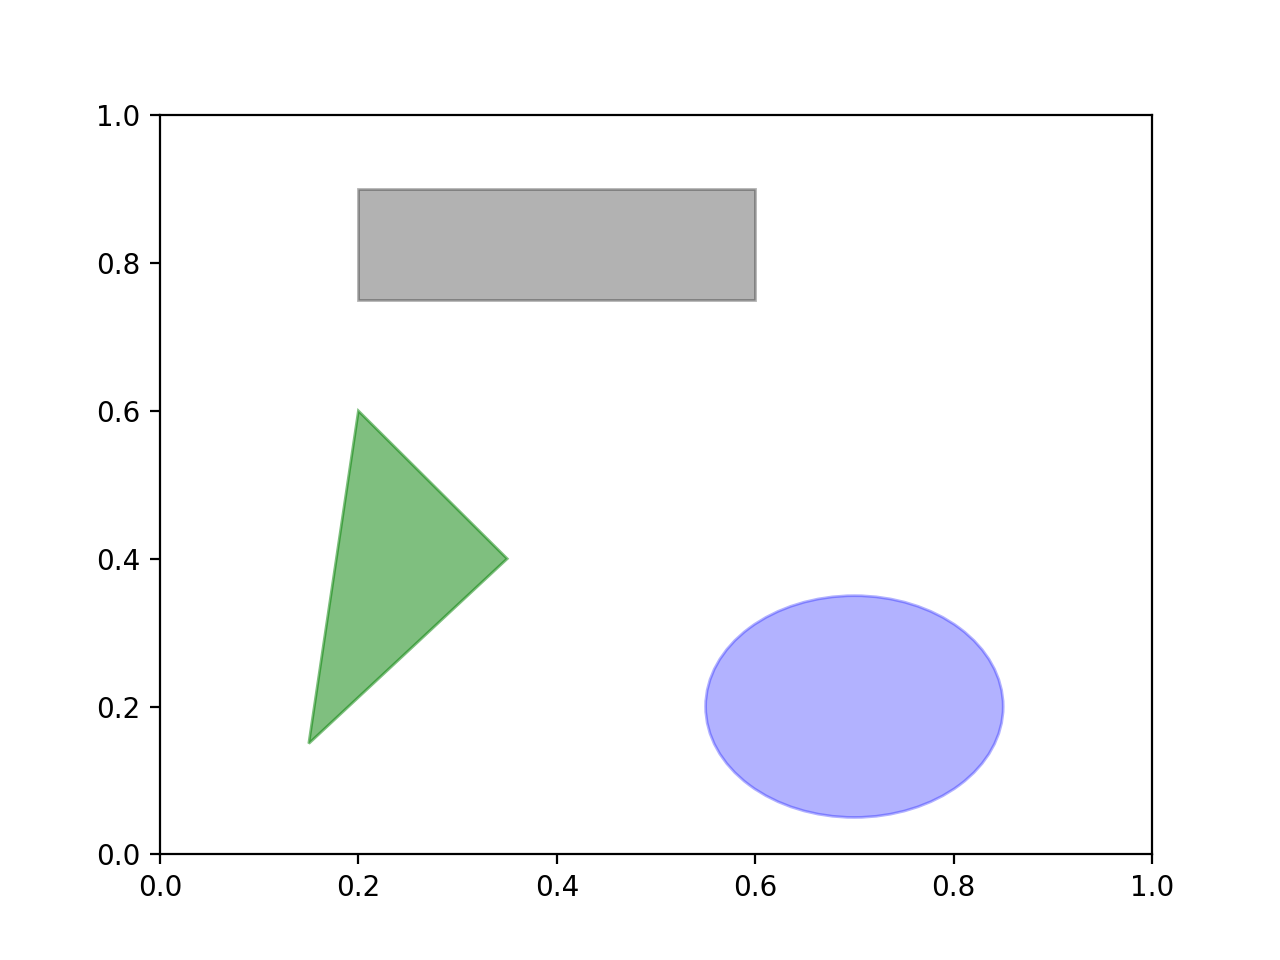

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. 

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you customize this file and place it in your home directory titled .matplotlibrc, it will be loaded each time you use matplotlib.

## 9.2 Plotting with pandas and seaborn

* In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. 
* Another library is seaborn, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization types.
  * If you import `seaborn` the default matplotlib style will be changed (improved)

### Line Plots

<IPython.core.display.Javascript object>


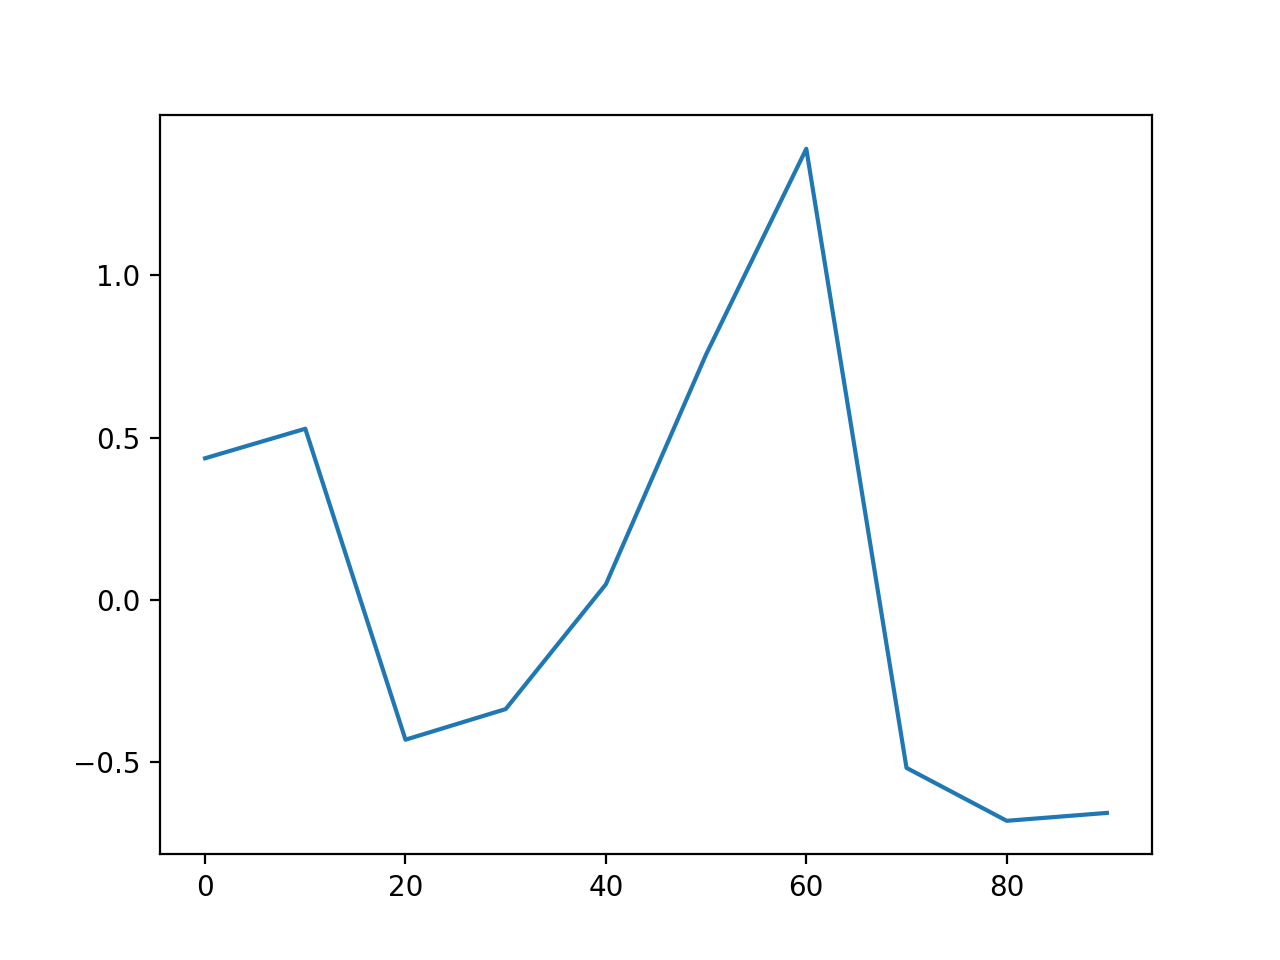

<AxesSubplot:>

In [35]:
plt.figure() # Create a new figure, or activate an existing figure.

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


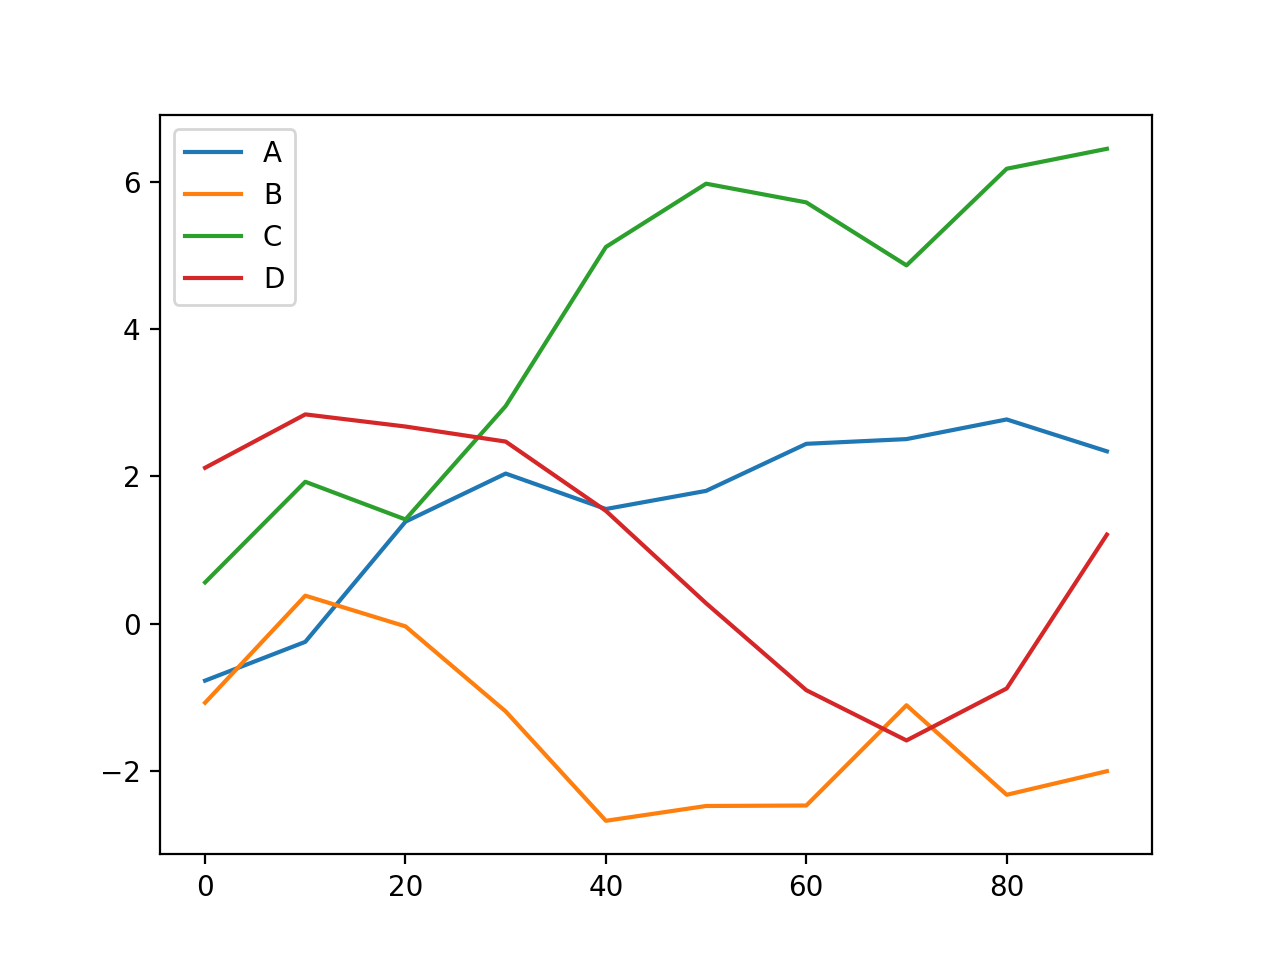

<AxesSubplot:>

In [36]:
# plt.figure() # why this makes an empty figure?

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

<IPython.core.display.Javascript object>


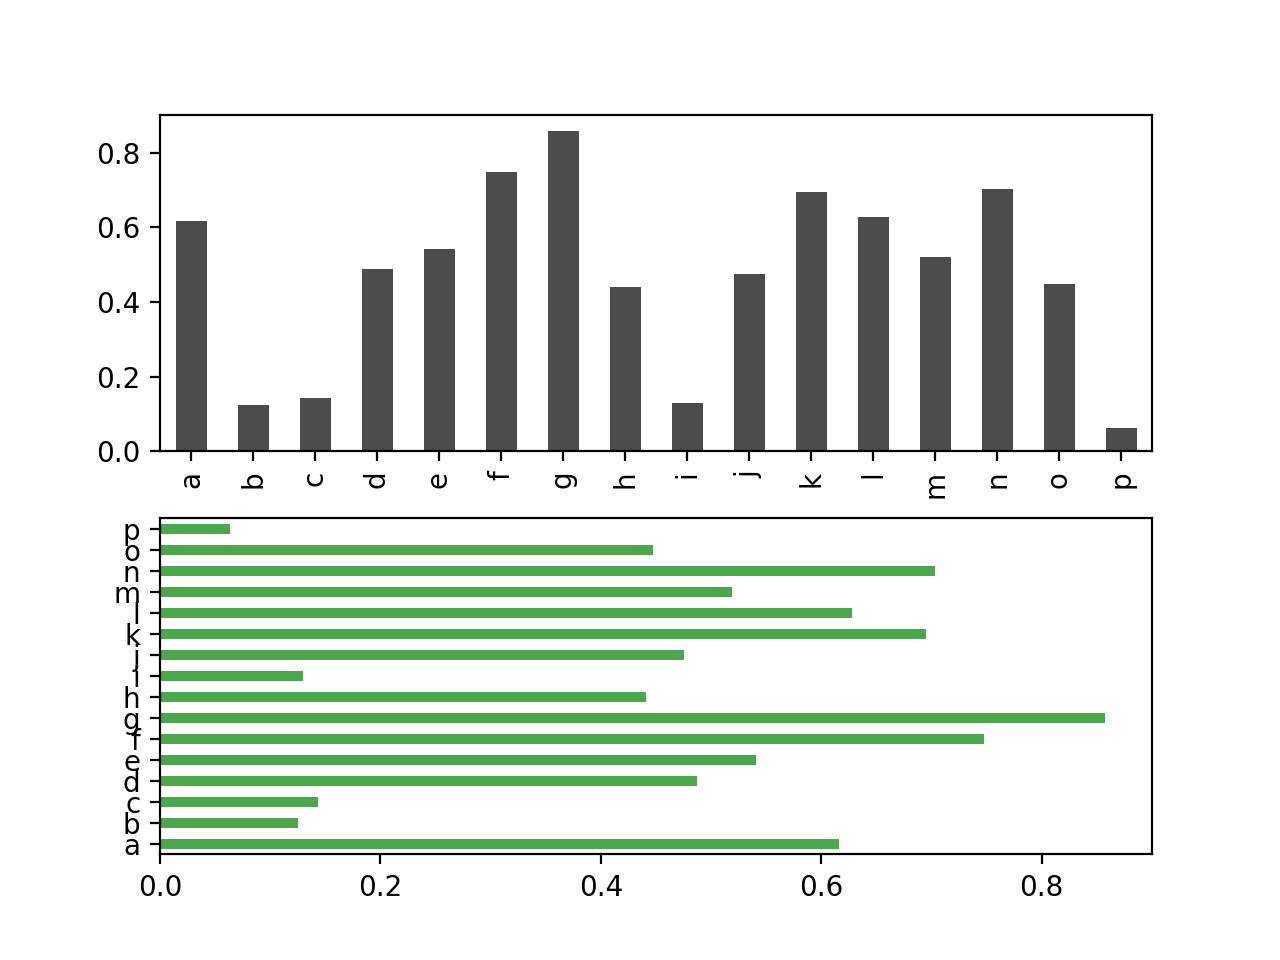

<AxesSubplot:>

In [37]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='g', alpha=0.7)

<IPython.core.display.Javascript object>


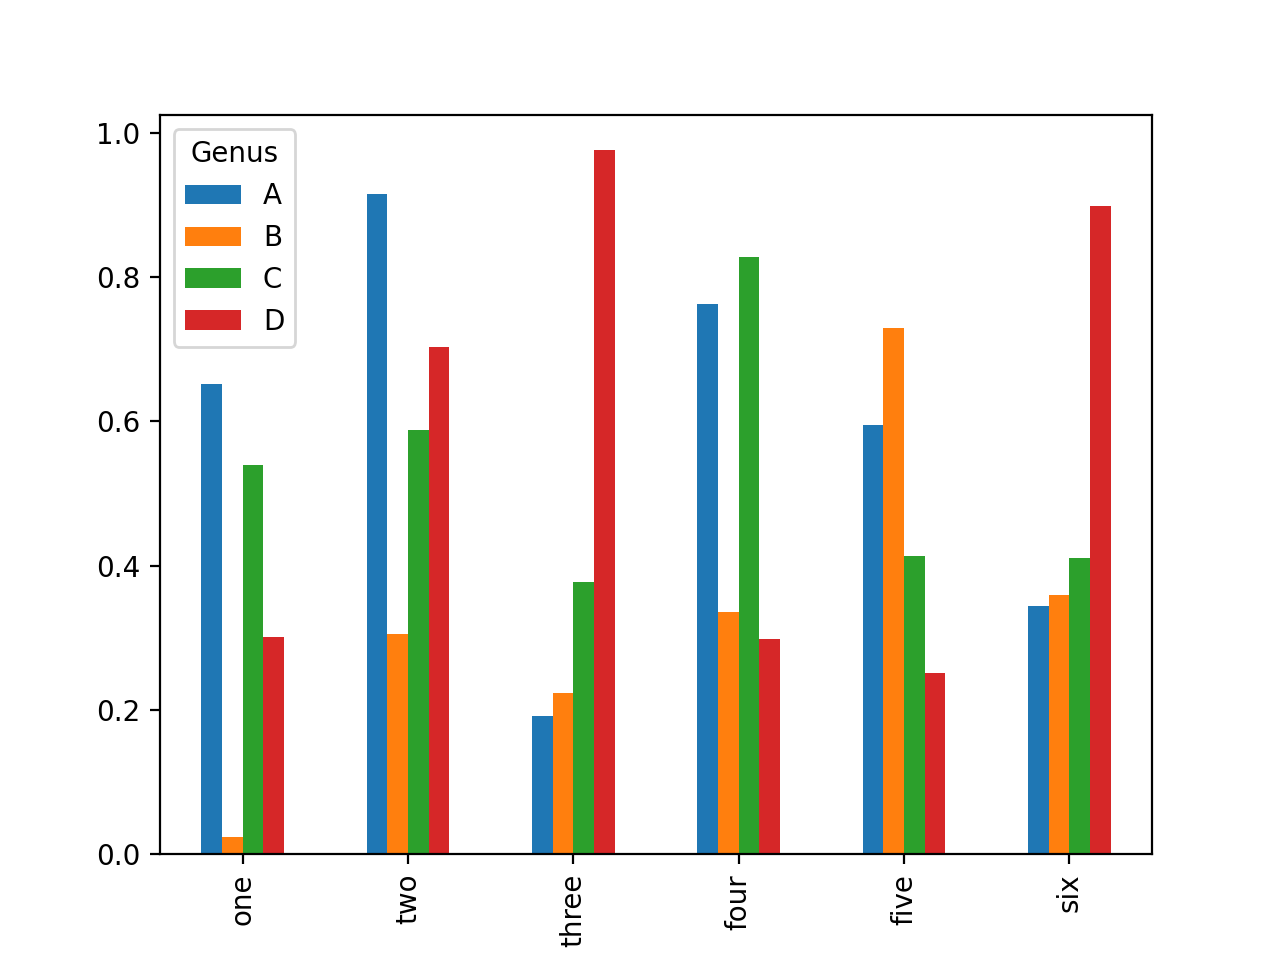

<AxesSubplot:>

In [40]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(list('ABCD'), name='Genus'))
df.plot.bar()

<IPython.core.display.Javascript object>


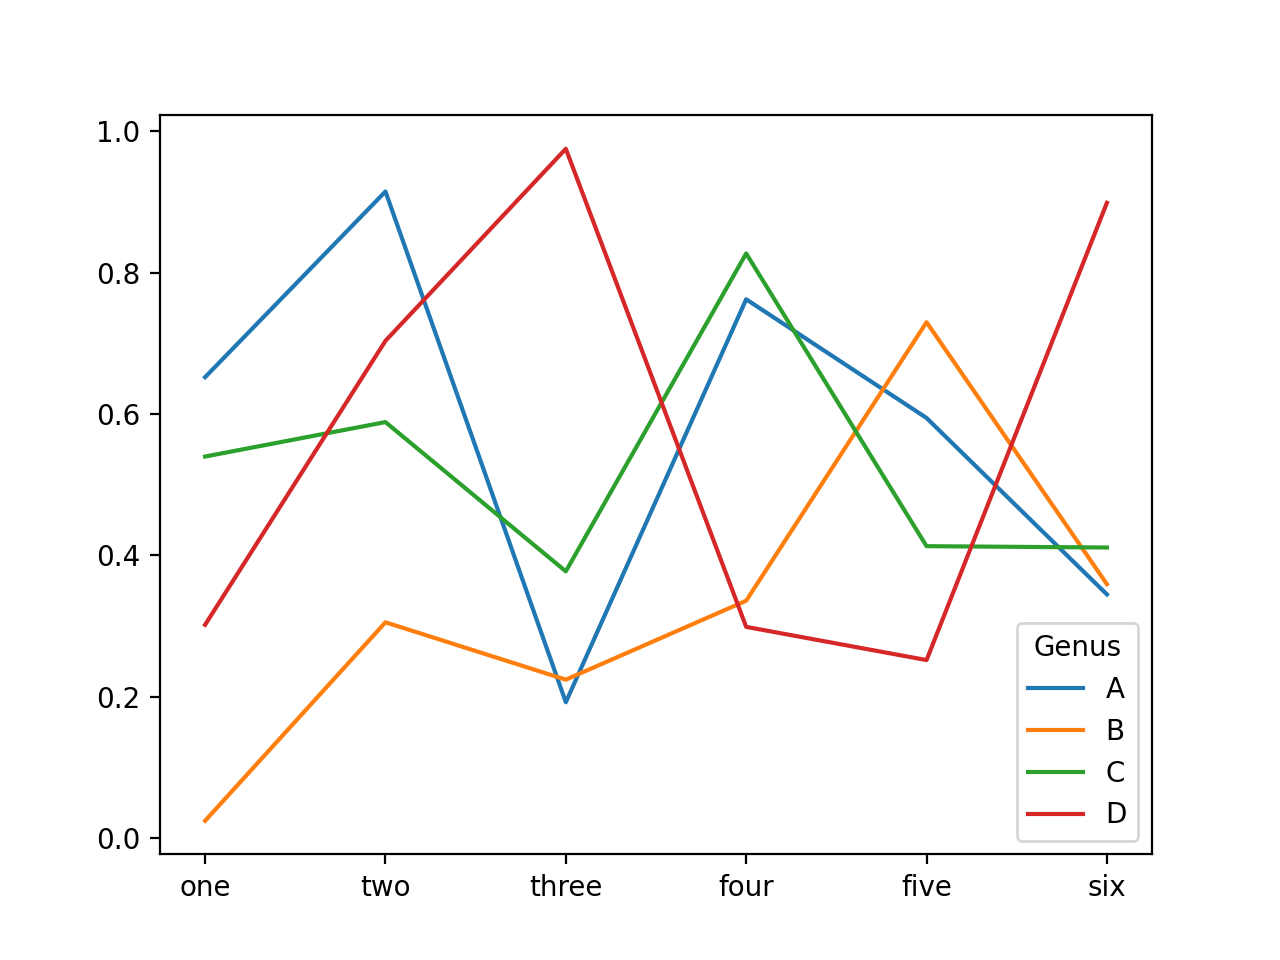

<AxesSubplot:>

In [41]:
df.plot.line()

<IPython.core.display.Javascript object>


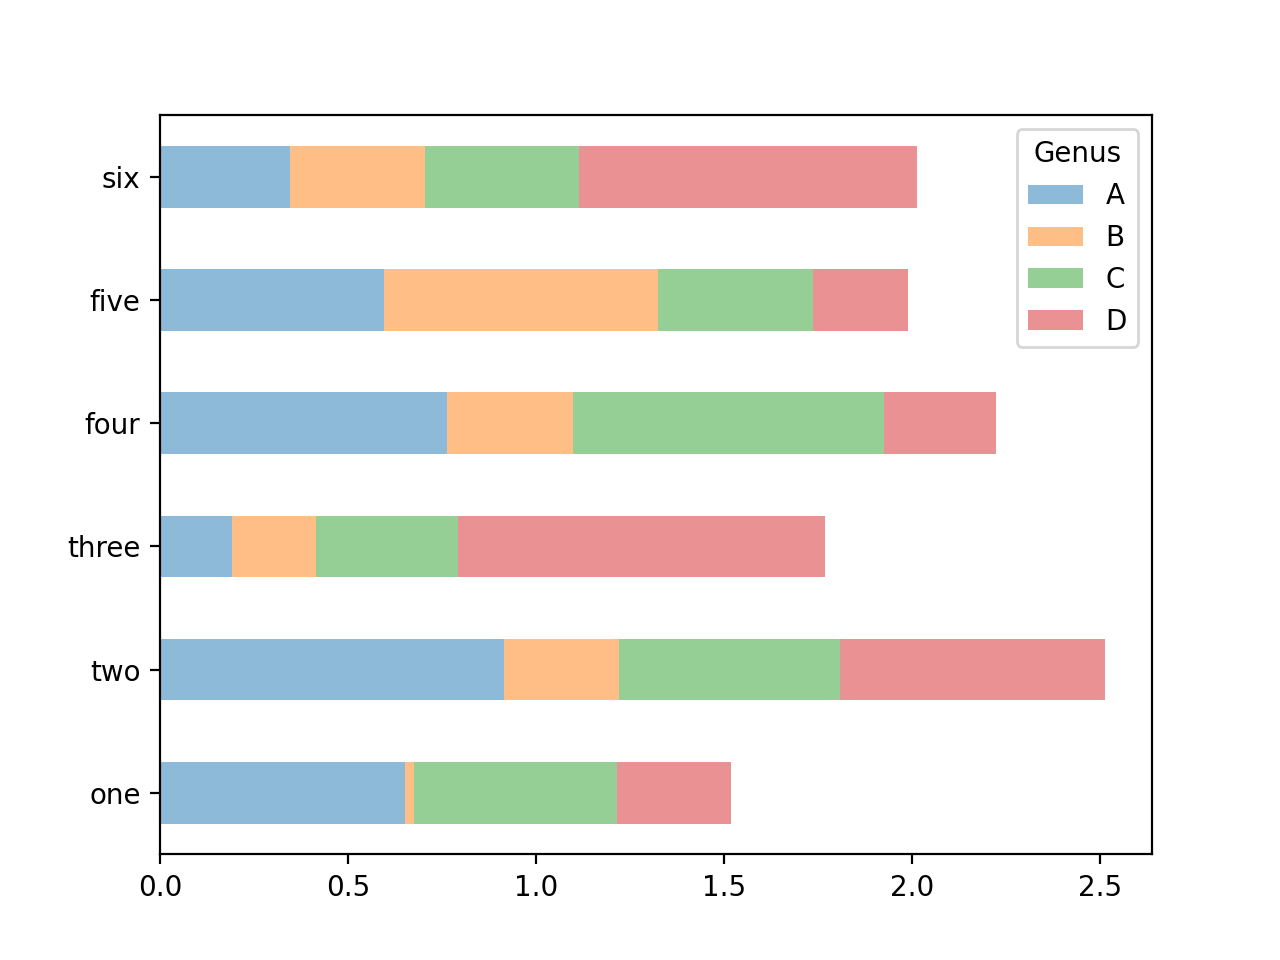

<AxesSubplot:>

In [42]:
df.plot.barh(stacked=True, alpha=0.5)

In [43]:
tips = pd.read_csv('pydata-book/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [44]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [47]:
party_counts = party_counts.loc[:, 2:5]

In [48]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


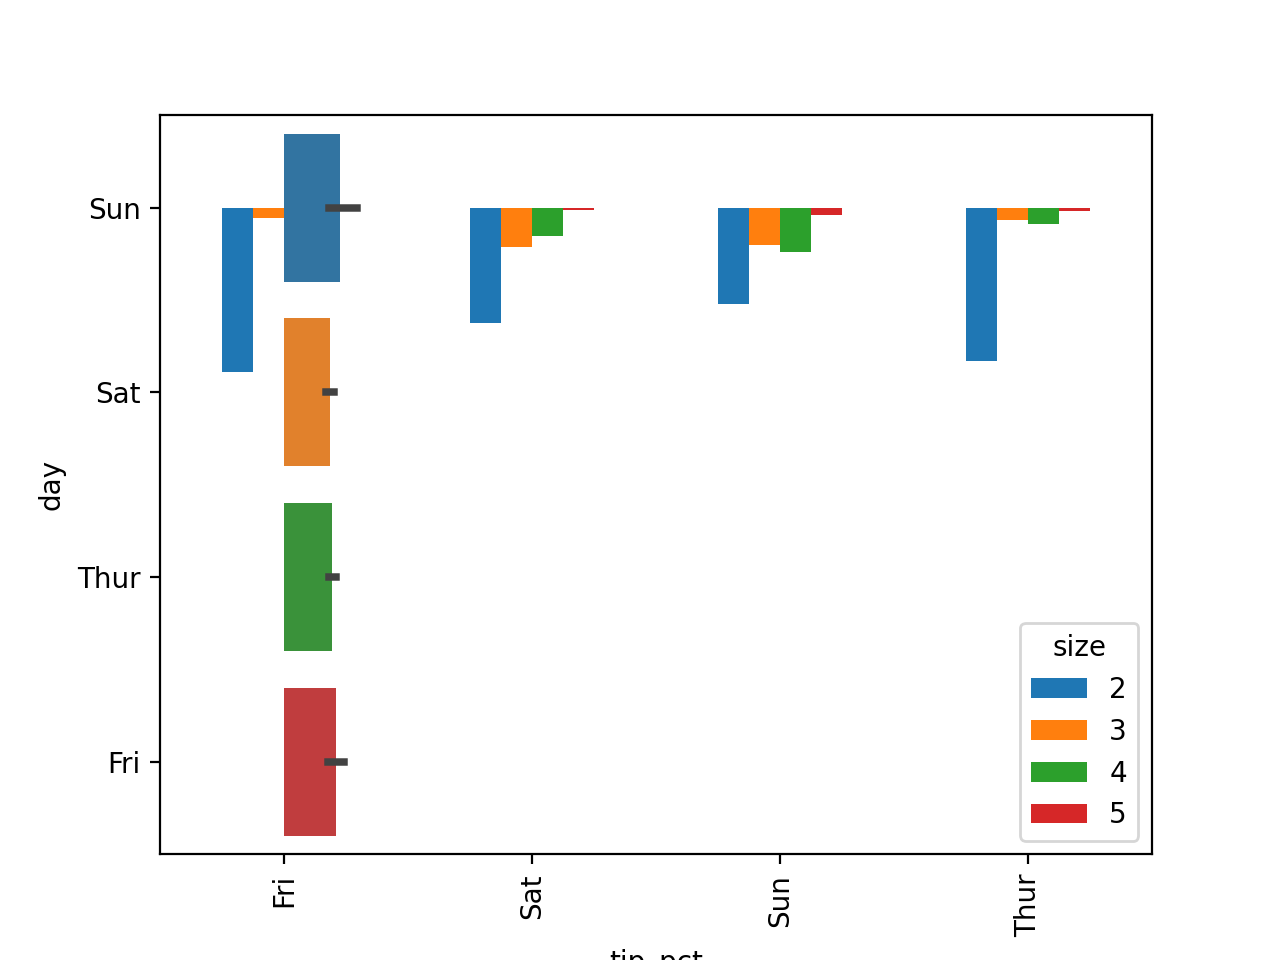

<AxesSubplot:xlabel='day'>

In [49]:
party_pcts.plot.bar()

In [51]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


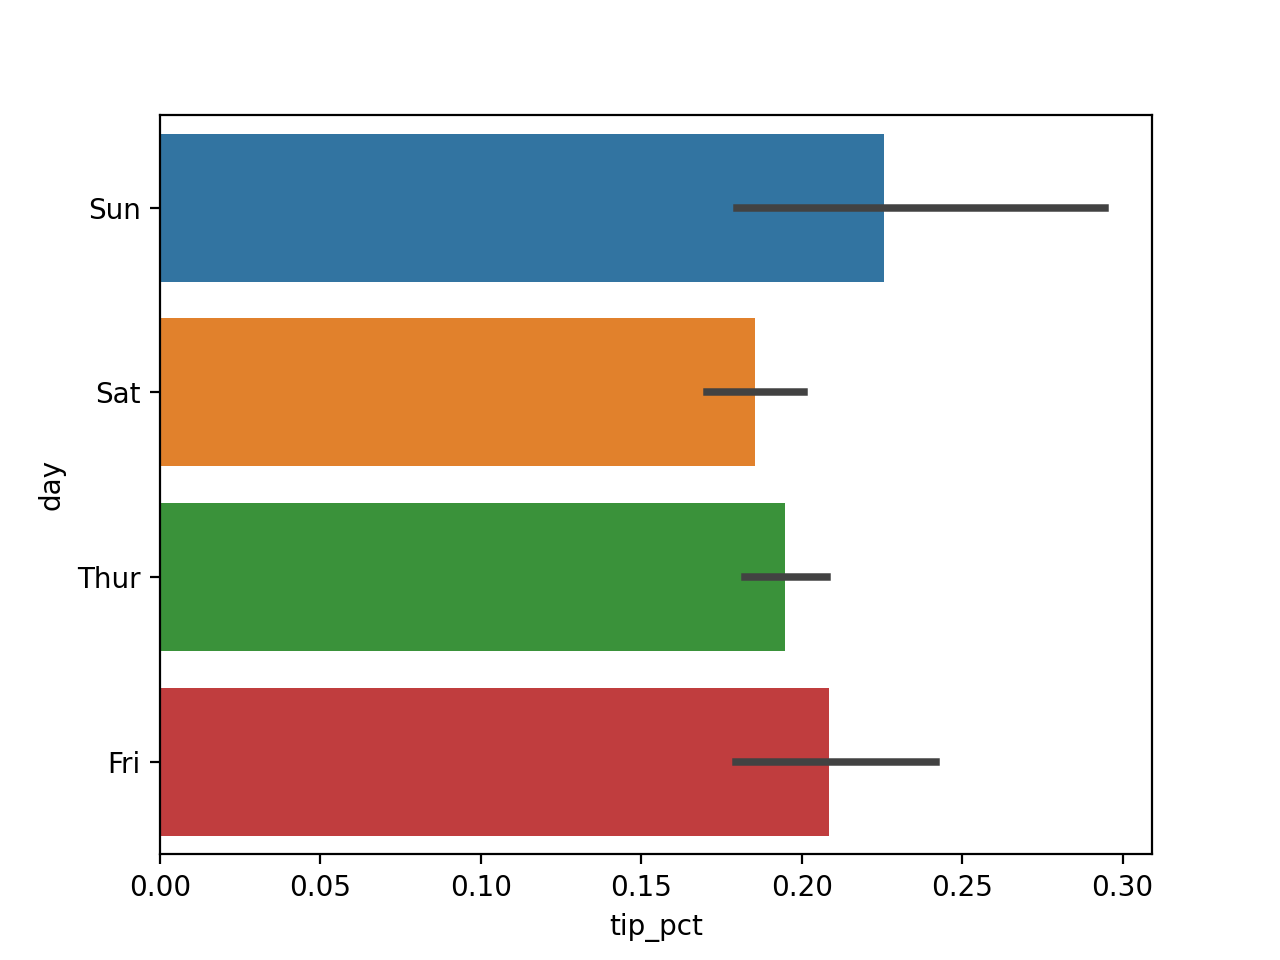

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [55]:
plt.figure()
# black line 95% confidence interval
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


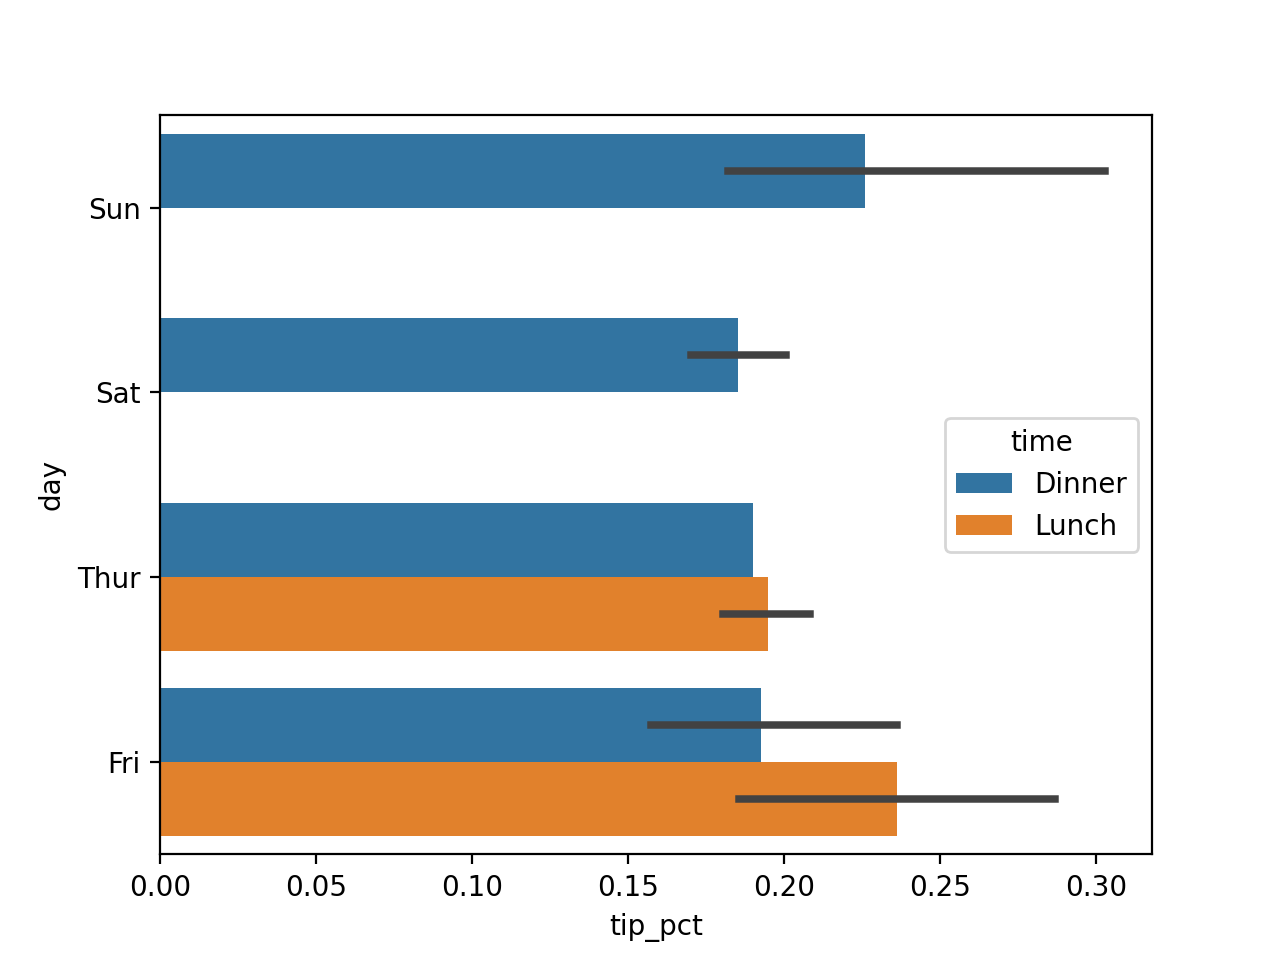

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [56]:
plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density Plots